In [2]:
# here we import all libraries we will use 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [3]:
data = [] # here we will add images data
labels = [] # here we will add images labels
classes = 43  # We have 43 Classes
os.chdir('/kaggle/input/gtsrb-german-traffic-sign')
cur_path = os.getcwd() # We get "/kaggle/input/gtsrb-german-traffic-sign" when we use 'os.getcwd()'

In [4]:
# for loop to save all images data and labels after resize it 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [5]:
data = np.array(data) # Converting data into numpy arrays
labels = np.array(labels) # Converting labels into numpy arrays

In [6]:
# Save Labels & Data for future use

np.save('/kaggle/working/G_data',data)
np.save('/kaggle/working/G_target',labels)

In [7]:
# split images to train & test data
# training shape:  (31367, 30, 30, 3) (31367,) %80
# testing shape:  (7842, 30, 30, 3) (7842,) %20

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
# One hot encoding
# convert the output array to categorical output

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
# The architecture of our CNN model
# Purpose of Different layers :
# MaxPool- This layer is used to reduce the size of images.
# Dense – for the feed-forward neural network.
# Flatten – It converts the parrel layers to squeeze the layers.
# Dropout – It is a regularization technique to reduce overfitting.

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

2022-11-12 12:52:05.690501: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
# Training and Validating the model
# While compiling the model, we need to specify the loss function, metrics and the optimizer we have to use.
# Loss Function – It calculates the loss done by the model we use categorical cross-entropy. We use categorical cross-entropy in the case of a multiclass classification problem statement.
# Optimizer – It is used to optimize the loss function.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# We will fit the train and test data to our model and train the convolutional model. We need to define several epochs to train for and batch size while introducing the model.

epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

2022-11-12 12:52:05.961608: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
981/981 [==============================] - 44s 44ms/step - loss: 1.8242 - accuracy: 0.5333 - val_loss: 0.3472 - val_accuracy: 0.9163
Epoch 2/20
981/981 [==============================] - 42s 43ms/step - loss: 0.5032 - accuracy: 0.8549 - val_loss: 0.1755 - val_accuracy: 0.9611
Epoch 3/20
981/981 [==============================] - 43s 44ms/step - loss: 0.3428 - accuracy: 0.9002 - val_loss: 0.1163 - val_accuracy: 0.9667
Epoch 4/20
981/981 [==============================] - 42s 43ms/step - loss: 0.2863 - accuracy: 0.9190 - val_loss: 0.0703 - val_accuracy: 0.9813
Epoch 5/20
981/981 [==============================] - 42s 43ms/step - loss: 0.2377 - accuracy: 0.9333 - val_loss: 0.0821 - val_accuracy: 0.9756
Epoch 6/20
981/981 [==============================] - 43s 44ms/step - loss: 0.2216 - accuracy: 0.9382 - val_loss: 0.0427 - val_accuracy: 0.9897
Epoch 7/20
981/981 [==============================] - 42s 43ms/step - loss: 0.2029 - accuracy: 0.9447 - val_loss: 0.0768 - val_accuracy:

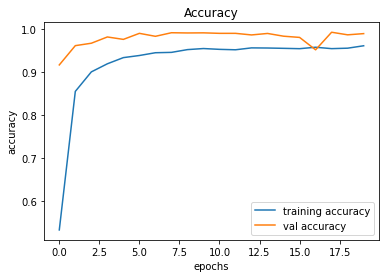

In [12]:
# Plot the accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

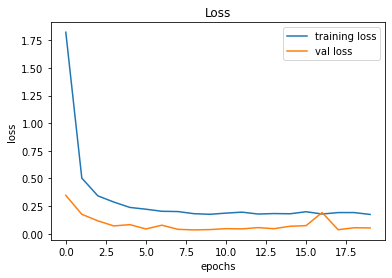

In [13]:
# Plot the Loss

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
#testing accuracy on test dataset

y_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)

#Accuracy with the test data
print(accuracy_score(labels, pred))


0.9581947743467933


In [15]:
model.save("/kaggle/working/G_final.h5")

In [16]:
model = load_model('/kaggle/working/G_final.h5')
# Classes of trafic signs
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [17]:
def test_on_img(img):
    data=[]
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    X_test=np.array(data)
    Y_pred = model.predict(X_test)
    Y_pred = np.argmax(Y_pred,axis=1)
    return image,Y_pred

Predicted traffic sign is:  Turn right ahead


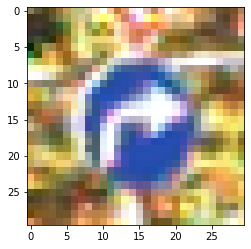

In [18]:
plot,prediction = test_on_img(r'/kaggle/input/gtsrb-german-traffic-sign/Test/00003.png')
s = [str(i) for i in prediction] 
a = int("".join(s)) 
print("Predicted traffic sign is: ", classes[a])
plt.imshow(plot)
plt.show()